## IMPORT LIBRARY

In [1]:
import pandas as pd

import string

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize

import matplotlib.pyplot as plt

from collections import Counter

from sklearn.model_selection import train_test_split as tts

from keras.preprocessing.text import Tokenizer

import numpy as np

from keras.preprocessing.sequence import pad_sequences

from sklearn.preprocessing import LabelEncoder

import tensorflow as tf

import matplotlib.pyplot as plt
from tensorflow.keras.callbacks import History

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/rafidahshafaarizaramadhan/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


## IMPORT DATA

In [3]:
df = pd.read_csv('Analisis_sentimen_timnas_sepakbola_indonesia_di_era_STY.csv')
df.head()

,komentar,label
0,<username> Simulasi indonesia kembali dijajah ...,negatif
1,<username> <username> <username> keturunan lai...,negatif
2,<username> <username> uda botak keturunan penj...,negatif
3,"<username> <username> <username> Belum tentu, ...",negatif
4,<username> <username> <username> Lu nya aja yg...,negatif


### Cek Missing Value and Duplikat

In [4]:
print('Missing value:')
print(df.isnull().sum())

print('\n\nData duplikat:')
print(df.duplicated().sum())

Missing value:
komentar    0
label       0
dtype: int64


Data duplikat:
4


### Drop Duplikat

In [5]:
df.drop_duplicates()

,komentar,label
0,<username> Simulasi indonesia kembali dijajah ...,negatif
1,<username> <username> <username> keturunan lai...,negatif
2,<username> <username> uda botak keturunan penj...,negatif
3,"<username> <username> <username> Belum tentu, ...",negatif
4,<username> <username> <username> Lu nya aja yg...,negatif
...,...,...
393,<username> <username> 3 tahun lalu indonesia m...,positif
394,\,positif
395,Naturalisasi pemain keturunan menjadi langkah ...,positif
396,semua persyaratan yang diperlukan untuk proses...,positif


### Mengubah Huruf 

In [6]:
df['komentar'] = df['komentar'].str.lower()

### Menghapus Tanda Baca

In [7]:
def remove_punctuation(words):
    return words.translate(str.maketrans('','',string.punctuation))
df['komentar'] = df['komentar'].apply(remove_punctuation)

### Menghapus Kata Yang Tidak Perlu

In [8]:
stop_word = [
    'yg',
    'yang',
    'di',
    'ini',
    'dan',
    'aja',
    'username',
    'itu',
    'ya'
]

def remove_stop_word(words):
    return [word for word in words if word not in stop_word]

df['komentar'] = df['komentar'].apply(word_tokenize)

df['komentar'] = df['komentar'].apply(remove_stop_word)

# Join lagi untuk melakukan EDA
df['komentar'] = df['komentar'].apply(' '.join)

## Exploratory Data Analysis (EDA)

### Komentar positif  

In [9]:
for i in range(1,11):
    print('email #', i)
    komentar_positif = df[df['label'] == 'positif']['komentar'].iloc[i]
    print(komentar_positif + '\n')

email # 1
indonesia 02 libya sty pasti berbenah baik taktik amp susunan pemain tapi libya sepertinya masih akan unggul strategibola tebakskor indonesia libya

email # 2
suka tidak suka coach sty lah berhasil membawa gairah positif untuk timnas level senior karena sejak evan dimas cs berhasil juala aff u19 orang2 cenderung lebih mengikuti timnas level junior ketimbang senior karena peforma timnas senior waktu jelek

email # 3
paling kerja keras tinggi menurut sty kalau lokal ada 2 pemainasnawi pratama arhan dia sering bikin contoh 2 pemain ketika ngelatih timnas kelompok umur arhan pas masih sering main emang ggsalah pilih klub dia

email # 4
salah satu alasan juga knp klub2 korea ttp ngelirik asnawi krn dari data statistik mereka pasti asnawi msh terhitung bagus buat standar kuota pemain asing bukan masalah koneksi sty dll arhan juga trmasuk kategori

email # 5
tolonglah sty ngelath dri rank 170an tekhnik pasing operan dasar masih ajarin latihan timnas seharusnya akademi ssb klub masin

### Komentar Negatif 

In [10]:
for i in range(1,11):
    print('email #', i)
    komentar_negatif = df[df['label'] == 'negatif']['komentar'].iloc[i]
    print(komentar_negatif + '\n')

email # 1
keturunan lain gak main bola emang bisa naturalisasi istimewa kepentingan negara sesuatu subjektif tergantung petingginya akal akalan naturalisasi biasa wajib bisa bahasa indonesia

email # 2
uda botak keturunan penjajah sok si paling paham tentang bola lu coach mentok karir ngelatih futsal sok oke lu anjing

email # 3
belum tentu gak semuanya jadi pemain bola milih karir sebagai pemain bola pun belum tentu kualitasnya cukup buat timnas kalau pssi cuma fokus ke pemain keturunan mah sama mempersempit kolam mereka sendiri

email # 4
lu nya bego makanya nonton sendiri tolol persepsi orang beda nggak harus sama bego memang coach tolol sty tolol out udah

email # 5
saya punya saran kepada kita terkenal dengan pola permainan cepat jika dihilangkan maka bahaya besar dalam persepak bolaan kita jadi mohon disampaikan ke ciri khas permainan kita

email # 6
sty ga coba asnawi jadi gelandang vo2 max nya paling tinggi loh diantara pemain timnas

email # 7
bukan masalah bnyak kesempatan ti

## Perbandingan Positif dan Negatif

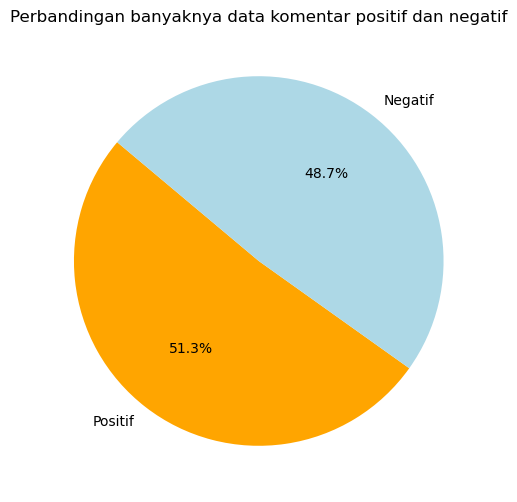

In [11]:
jumlah_komentar = df['label'].value_counts()

plt.figure(figsize=(8,6))
plt.pie(jumlah_komentar, labels=['Positif', 'Negatif'], autopct='%1.1f%%', startangle=140, colors=['orange', 'lightblue'])
plt.title('Perbandingan banyaknya data komentar positif dan negatif')
plt.show()


### Memisahkan positif dan negatif 

In [12]:
komentar_positif = df[df['label'] == 'positif']['komentar']
komentar_negatif = df[df['label'] == 'negatif']['komentar']

kata_positif = Counter()
komentar_positif.apply(lambda x: kata_positif.update(x.split()))

kata_negatif = Counter()
komentar_negatif.apply(lambda x: kata_negatif.update(x.split()))

# mengetahui 10 kata yang paling sering digunakan
top_kata_positif = kata_positif.most_common(10)
top_kata_negatif = kata_negatif.most_common(10)

top_kata_positif_df = pd.DataFrame(top_kata_positif, columns=['Kata','Frekuensi'])
top_kata_negatif_df = pd.DataFrame(top_kata_negatif, columns=['Kata','Frekuensi'])

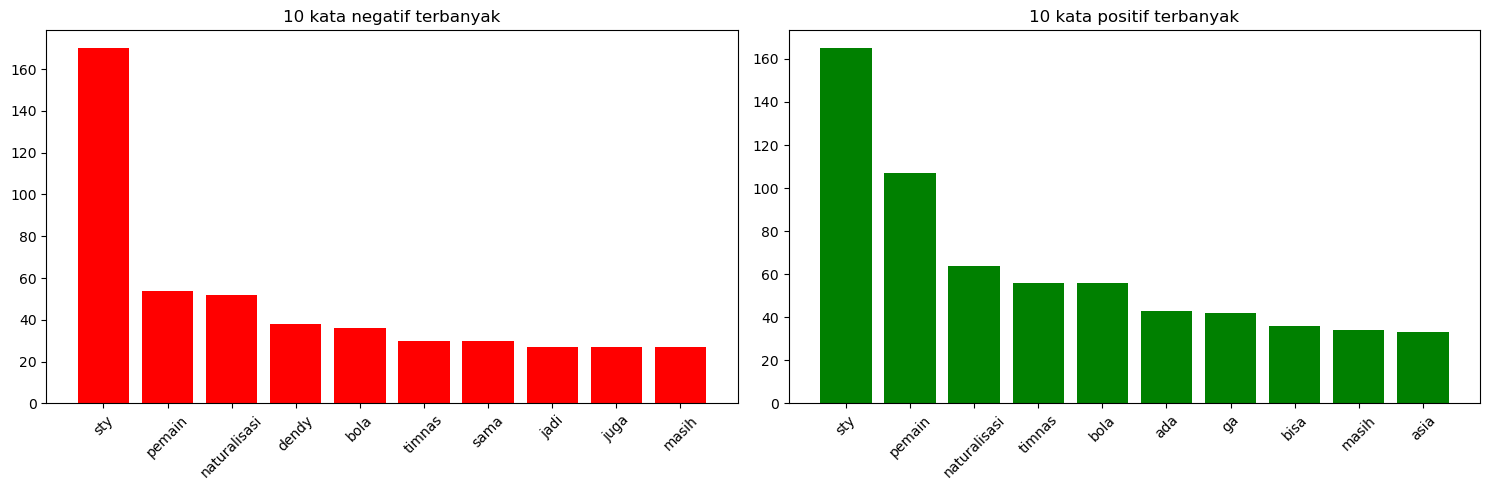

In [13]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.bar(top_kata_negatif_df['Kata'], top_kata_negatif_df['Frekuensi'], color='red')
plt.title('10 kata negatif terbanyak')
plt.xticks(rotation=45)

plt.subplot(1, 2, 2)
plt.bar(top_kata_positif_df['Kata'], top_kata_positif_df['Frekuensi'], color='green')
plt.title('10 kata positif terbanyak')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


## Training dan Testing

In [14]:
X = df['komentar']
y = df['label']

X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2, random_state=7)

### Mengurai kalimat menjadi kata

In [15]:
max_kata = 1000
tokenizer = Tokenizer(num_words=max_kata)
tokenizer.fit_on_texts(X_train)

X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

In [16]:
panjang_sequences = [len(seq) for seq in X_train_seq]

median = np.median(panjang_sequences)

print("Median data training: ",median)

Median data training:  17.0


In [17]:
max_panjang = 22

X_train_padded = pad_sequences(X_train_seq, maxlen=max_panjang, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_panjang, padding='post')

In [18]:
label_encoder = LabelEncoder()

y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.fit_transform(y_test)

## PEMODELAN

In [19]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(input_dim=max_kata , output_dim=4),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(
    loss='binary_crossentropy',
    optimizer='Adam',
    metrics=['accuracy']
)

history = model.fit(
    X_train_padded,
    y_train_encoded,
    epochs=30,
    batch_size=8,
    validation_data=(X_test_padded, y_test_encoded),
    verbose=2,
)

Epoch 1/30
40/40 - 2s - loss: 0.6939 - accuracy: 0.4811 - val_loss: 0.6928 - val_accuracy: 0.4875 - 2s/epoch - 38ms/step
Epoch 2/30
40/40 - 0s - loss: 0.6814 - accuracy: 0.6226 - val_loss: 0.6700 - val_accuracy: 0.5875 - 151ms/epoch - 4ms/step
Epoch 3/30
40/40 - 0s - loss: 0.5316 - accuracy: 0.7673 - val_loss: 0.6706 - val_accuracy: 0.6125 - 148ms/epoch - 4ms/step
Epoch 4/30
40/40 - 0s - loss: 0.2781 - accuracy: 0.8994 - val_loss: 0.7766 - val_accuracy: 0.6750 - 149ms/epoch - 4ms/step
Epoch 5/30
40/40 - 0s - loss: 0.1669 - accuracy: 0.9465 - val_loss: 0.9071 - val_accuracy: 0.6250 - 146ms/epoch - 4ms/step
Epoch 6/30
40/40 - 0s - loss: 0.1024 - accuracy: 0.9654 - val_loss: 0.9523 - val_accuracy: 0.6375 - 145ms/epoch - 4ms/step
Epoch 7/30
40/40 - 0s - loss: 0.0414 - accuracy: 0.9906 - val_loss: 1.5890 - val_accuracy: 0.6125 - 146ms/epoch - 4ms/step
Epoch 8/30
40/40 - 0s - loss: 0.0380 - accuracy: 0.9906 - val_loss: 1.4469 - val_accuracy: 0.7000 - 144ms/epoch - 4ms/step
Epoch 9/30
40/40 -

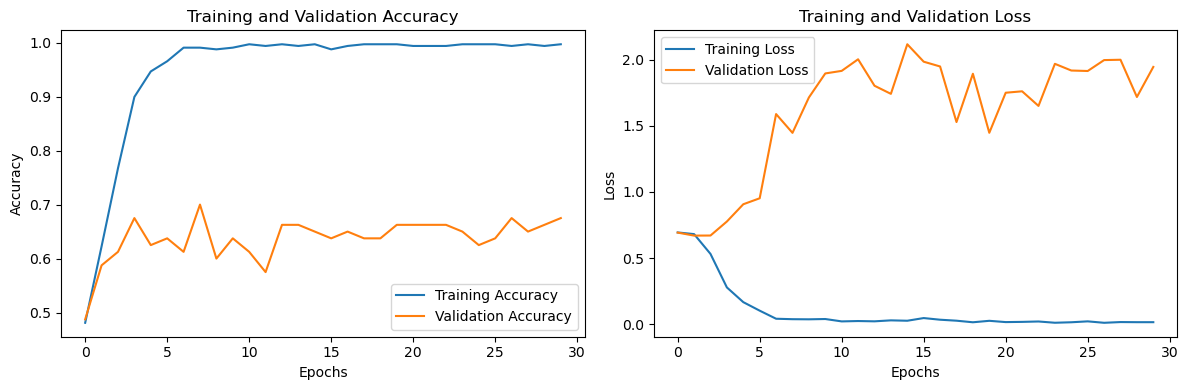

In [20]:
## Mendapatkan riwayat pelatihan
train_loss = history.history['loss']
train_accuracy = history.history['accuracy']
val_loss = history.history['val_loss']
val_accuracy = history.history['val_accuracy']

## Plot akurasi
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(train_accuracy, label='Training Accuracy')
plt.plot(val_accuracy, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

## Plot loss
plt.subplot(1, 2, 2)
plt.plot(train_loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()